In [1]:
import numpy as np
import pandas as pd
import csv
import pandas as pd
from datetime import datetime
import glob

In [2]:
df1 = pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')
df2 = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df3 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-onwards.csv')
df4 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')

In [3]:
df3.drop(columns=['remaining_lease'], inplace=True)

In [4]:
df_all = pd.concat([pd.DataFrame(df1),pd.DataFrame(df2), pd.DataFrame(df3), pd.DataFrame(df4)]).reset_index(drop=True)

In [5]:
df_all['month'] =  pd.to_datetime(df_all['month'], format='%Y-%m')

In [6]:
df_all['lease_commence_date'] =  pd.to_datetime(df_all['lease_commence_date'], format='%Y')

In [7]:
df_all['year'] = pd.DatetimeIndex(df_all['month']).year

In [8]:
df_all['lease_commence_year'] = pd.DatetimeIndex(df_all['lease_commence_date']).year

In [9]:
import datawig

In [12]:
df_test = df_all[df_all['year']==2018]

In [10]:
df_train = df_all[(df_all['year']==2017) |(df_all['year']==2016) |(df_all['year']==2015) |(df_all['year']==2014)|(df_all['year']==2013)]

In [13]:
df_test[1:5]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,lease_commence_year
715300,2018-01-01,ANG MO KIO,3 ROOM,319,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1977-01-01,300000.0,2018,1977
715301,2018-01-01,ANG MO KIO,3 ROOM,319,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1977-01-01,328000.0,2018,1977
715302,2018-01-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,10 TO 12,68.0,New Generation,1981-01-01,300000.0,2018,1981
715303,2018-01-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,04 TO 06,68.0,New Generation,1981-01-01,273000.0,2018,1981


In [14]:
imputer = datawig.SimpleImputer(
    input_columns=['flat_model','flat_type', 'floor_area_sqm', 'lease_commence_year', 'year', 'storey_range','street_name', 'town'], # column(s) containing information about the column we want to impute
    output_column='resale_price', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

In [15]:
imputer.fit(train_df=df_train, num_epochs=3)

2019-05-05 20:22:06,334 [INFO]  Assuming 3 numeric input columns: floor_area_sqm, lease_commence_year, year
2019-05-05 20:22:06,365 [INFO]  Assuming 5 string input columns: street_name, flat_type, storey_range, town, flat_model
2019-05-05 20:22:06,381 [INFO]  No output column name provided for ColumnEncoder using resale_price
2019-05-05 20:22:06,382 [INFO]  Assuming numeric output column: resale_price
2019-05-05 20:22:06,386 [INFO]  Using [[cpu(0)]] as the context for training
2019-05-05 20:22:06,453 [INFO]  Fitting label encoder <class 'datawig.column_encoders.NumericalEncoder'> on 80727 rows                             of training data
2019-05-05 20:22:06,473 [INFO]  Detected 0 rows with missing labels                         for column resale_price
2019-05-05 20:22:06,481 [INFO]  Dropping 0/80727 rows
2019-05-05 20:22:06,498 [INFO]  Detected 0 rows with missing labels                         for column resale_price
2019-05-05 20:22:06,501 [INFO]  Dropping 0/8969 rows
2019-05-05 20:2

In [16]:
imputed = imputer.predict(df_test)

2019-05-05 20:26:05,750 [INFO]  Applying Hashing BoW Encoding to columns ['street_name', 'flat_type', 'storey_range', 'town', 'flat_model'] with prefix into column ngram_features-2yW4Acq9GF
2019-05-05 20:26:11,799 [INFO]  Data Encoding - Encoded 21584 rows of column                         street_name,flat_type,storey_range,town,flat_model with <class 'datawig.column_encoders.BowEncoder'> into                         <class 'scipy.sparse.csr.csr_matrix'> of shape (21584, 32768)                         and then into shape (21584, 32768)
2019-05-05 20:26:11,808 [INFO]  Concatenating numeric columns ['floor_area_sqm', 'lease_commence_year', 'year'] into numerical_features-z6Y1t9EwL5
2019-05-05 20:26:11,811 [INFO]  Normalizing with StandardScaler
2019-05-05 20:26:11,829 [INFO]  Data Encoding - Encoded 21584 rows of column                         floor_area_sqm,lease_commence_year,year with <class 'datawig.column_encoders.NumericalEncoder'> into                         <class 'numpy.ndarray

In [17]:
imputed

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,lease_commence_year,resale_price_imputed
715299,2018-01-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,10 TO 12,44.0,Improved,1978-01-01,250000.0,2018,1978,224901.871319
715300,2018-01-01,ANG MO KIO,3 ROOM,319,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1977-01-01,300000.0,2018,1977,315924.386067
715301,2018-01-01,ANG MO KIO,3 ROOM,319,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1977-01-01,328000.0,2018,1977,327078.463908
715302,2018-01-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,10 TO 12,68.0,New Generation,1981-01-01,300000.0,2018,1981,332839.397842
715303,2018-01-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,04 TO 06,68.0,New Generation,1981-01-01,273000.0,2018,1981,322545.270790
715304,2018-01-01,ANG MO KIO,3 ROOM,405,ANG MO KIO AVE 10,07 TO 09,82.0,New Generation,1979-01-01,330000.0,2018,1979,364863.060561
715305,2018-01-01,ANG MO KIO,3 ROOM,560,ANG MO KIO AVE 10,04 TO 06,82.0,New Generation,1980-01-01,295000.0,2018,1980,360013.233622
715306,2018-01-01,ANG MO KIO,3 ROOM,576,ANG MO KIO AVE 10,13 TO 15,82.0,New Generation,1980-01-01,365000.0,2018,1980,383818.204467
715307,2018-01-01,ANG MO KIO,3 ROOM,443,ANG MO KIO AVE 10,01 TO 03,82.0,New Generation,1979-01-01,320000.0,2018,1979,341362.864046
715308,2018-01-01,ANG MO KIO,3 ROOM,466,ANG MO KIO AVE 10,04 TO 06,67.0,New Generation,1984-01-01,255000.0,2018,1984,325781.550831


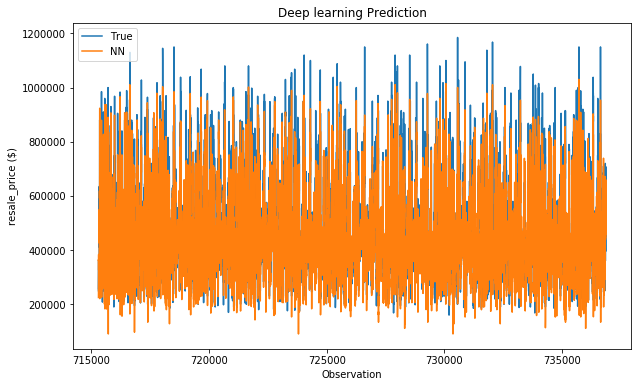

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(imputed['resale_price'], label='True')
plt.plot(imputed['resale_price_imputed'], label='NN')
plt.title("Deep learning Prediction")
plt.xlabel('Observation')
plt.ylabel('resale_price ($)')
plt.legend()
plt.show();

In [21]:
imputed.to_csv('raw2.csv', encoding='utf-8-sig')

In [2]:
temp = pd.read_csv('raw2.csv')

In [3]:
from sklearn.metrics import mean_squared_error

In [5]:
from math import sqrt

In [6]:
#RMSE
sqrt(mean_squared_error(temp['resale_price'], temp['resale_price_imputed']))

46636.93001334342